In [49]:
import quandl
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

series = quandl.get("EOD/DIS", authtoken="7HMJ8wiGRYnv99hiJ8th")
series.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
1962-01-02,37.25,38.50,37.25,37.25,2098.0,0.0,1.0,0.137931,0.142559,0.137931,0.137931,408858.24
1962-01-03,37.25,37.88,37.25,37.75,1998.0,0.0,1.0,0.137931,0.140264,0.137931,0.139782,389370.24
1962-01-04,37.75,37.88,37.50,37.75,2397.0,0.0,1.0,0.139782,0.140264,0.138857,0.139782,467127.36
1962-01-05,37.75,38.00,37.63,37.88,2397.0,0.0,1.0,0.139782,0.140708,0.139338,0.140264,467127.36
1962-01-08,37.88,38.38,37.00,37.75,3197.0,0.0,1.0,0.140264,0.142115,0.137005,0.139782,623031.36


In [50]:
series.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividend', 'Split',
       'Adj_Open', 'Adj_High', 'Adj_Low', 'Adj_Close', 'Adj_Volume'],
      dtype='object')

In [51]:

series.drop(['Open', 'High', 'Low', 'Volume', 'Dividend', 'Split', 'Adj_Open', 'Adj_High', 'Adj_Low', 'Adj_Close', 'Adj_Volume'], axis=1, inplace=True)
series.head()

,Close
Date,
1962-01-02,37.25
1962-01-03,37.75
1962-01-04,37.75
1962-01-05,37.88
1962-01-08,37.75


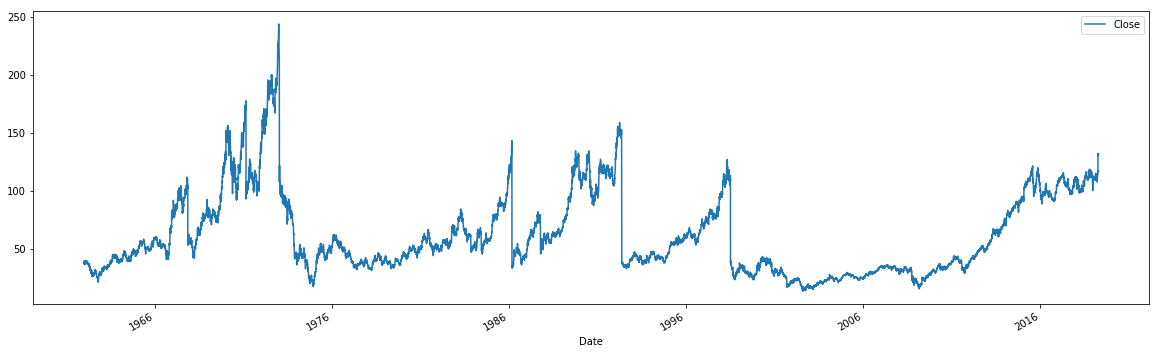

In [52]:
series.plot(figsize=(20,6))
plt.show();

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import time
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

In [55]:
def convertSeriesToMatrix(vectorSeries, sequence_length):
    matrix=[]
    for i in range(len(vectorSeries)-sequence_length+1):
        matrix.append(vectorSeries[i:i+sequence_length])
    return matrix

In [56]:
np.random.seed(2019)

In [57]:
sequence_length = 20

In [58]:
vector_vix = list(series.Close.values)
vector_vix

[37.25,
 37.75,
 37.75,
 37.88,
 37.75,
 38.5,
 38.87,
 40.0,
 38.75,
 38.75,
 37.75,
 36.5,
 37.25,
 38.0,
 38.63,
 38.5,
 38.0,
 37.5,
 37.25,
 37.25,
 37.5,
 37.5,
 38.0,
 38.0,
 38.0,
 37.75,
 38.25,
 39.25,
 39.5,
 39.5,
 39.5,
 39.0,
 39.25,
 40.0,
 39.38,
 39.75,
 39.25,
 39.0,
 38.0,
 37.75,
 37.37,
 38.38,
 38.12,
 38.25,
 37.75,
 37.5,
 38.12,
 38.0,
 38.75,
 39.38,
 39.0,
 39.25,
 39.25,
 39.25,
 38.75,
 38.12,
 37.75,
 37.75,
 37.5,
 37.0,
 36.75,
 37.37,
 37.37,
 37.0,
 36.75,
 37.0,
 36.75,
 37.13,
 37.25,
 37.13,
 36.75,
 35.0,
 34.75,
 35.25,
 36.0,
 36.5,
 36.5,
 37.0,
 37.5,
 37.37,
 36.5,
 35.75,
 34.37,
 34.75,
 35.0,
 34.75,
 34.75,
 34.25,
 33.5,
 32.5,
 32.0,
 31.25,
 33.0,
 33.25,
 32.25,
 31.75,
 32.0,
 32.0,
 32.0,
 30.5,
 30.75,
 31.25,
 31.0,
 28.75,
 32.0,
 32.0,
 30.0,
 30.88,
 31.87,
 31.0,
 31.5,
 31.0,
 29.87,
 29.0,
 26.38,
 28.63,
 29.0,
 29.0,
 28.5,
 28.0,
 27.25,
 26.12,
 26.12,
 27.25,
 27.25,
 26.75,
 27.0,
 28.37,
 28.0,
 27.25,
 27.25,
 28.5,
 

In [59]:
len(vector_vix)

14424

In [60]:
# convert the vector to a 2D matrix
matrix_vix = convertSeriesToMatrix(vector_vix, sequence_length)

# shift all data by mean
matrix_vix = np.array(matrix_vix)
shifted_value = matrix_vix.mean()
matrix_vix -= shifted_value
print("Data shape: ", matrix_vix.shape)

Data shape:  (14405, 20)


In [61]:
# split dataset: 90% for training and 10% for testing
train_row = int(round(0.9 * matrix_vix.shape[0]))
train_set = matrix_vix[:train_row, :]

# shuffle the training set (but do not shuffle the test set)
np.random.shuffle(train_set)

In [62]:
# the training set
X_train = train_set[:, :-1]
# the last column is the true value to compute the mean-squared-error loss
y_train = train_set[:, -1] 
# the test set
X_test = matrix_vix[train_row:, :-1]
y_test = matrix_vix[train_row:, -1]

In [63]:
# the input to LSTM layer needs to have the shape of (number of samples, the dimension of each element)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [64]:
print(X_train.shape)
print(X_test.shape)

(12964, 19, 1)
(1441, 19, 1)


In [65]:
model = Sequential()
# layer 1: LSTM
model.add(LSTM( input_dim=1, output_dim=50, return_sequences=True))
model.add(Dropout(0.2))
# layer 2: LSTM
model.add(LSTM(output_dim=100, return_sequences=False))
model.add(Dropout(0.2))
# layer 3: dense
# linear activation: a(x) = x
model.add(Dense(output_dim=1, activation='linear'))
# compile the model
model.compile(loss="mse", optimizer="rmsprop")

C:\Users\Santhosh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Santhosh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Santhosh\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=False, units=100)`
  
C:\Users\Santhosh\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  # Remove the CWD from sys.path while we load stuff.


In [66]:
model.fit(X_train, y_train, batch_size=512, epochs=50, validation_split=0.05, verbose=1)

# evaluate the result
test_mse = model.evaluate(X_test, y_test, verbose=1)
print('The mean squared error (MSE) on the test data set is %.3f over %d test samples.' % (test_mse, len(y_test)))

Train on 12315 samples, validate on 649 samples
Epoch 1/50
12315/12315 [==============================] - 7s 557us/step - loss: 872.7419 - val_loss: 618.4917
Epoch 2/50
12315/12315 [==============================] - 4s 305us/step - loss: 641.9450 - val_loss: 492.2686
Epoch 3/50
12315/12315 [==============================] - 4s 301us/step - loss: 525.4294 - val_loss: 411.7704
Epoch 4/50
12315/12315 [==============================] - 4s 314us/step - loss: 456.7748 - val_loss: 363.0480
Epoch 5/50
12315/12315 [==============================] - 4s 286us/step - loss: 405.6368 - val_loss: 322.9080
Epoch 6/50
12315/12315 [==============================] - 4s 314us/step - loss: 364.2281 - val_loss: 285.6760
Epoch 7/50
12315/12315 [==============================] - 4s 327us/step - loss: 326.9351 - val_loss: 256.4200
Epoch 8/50
12315/12315 [==============================] - 4s 316us/step - loss: 293.5379 - val_loss: 231.0291
Epoch 9/50
12315/12315 [==============================] - 4s 316us/step 

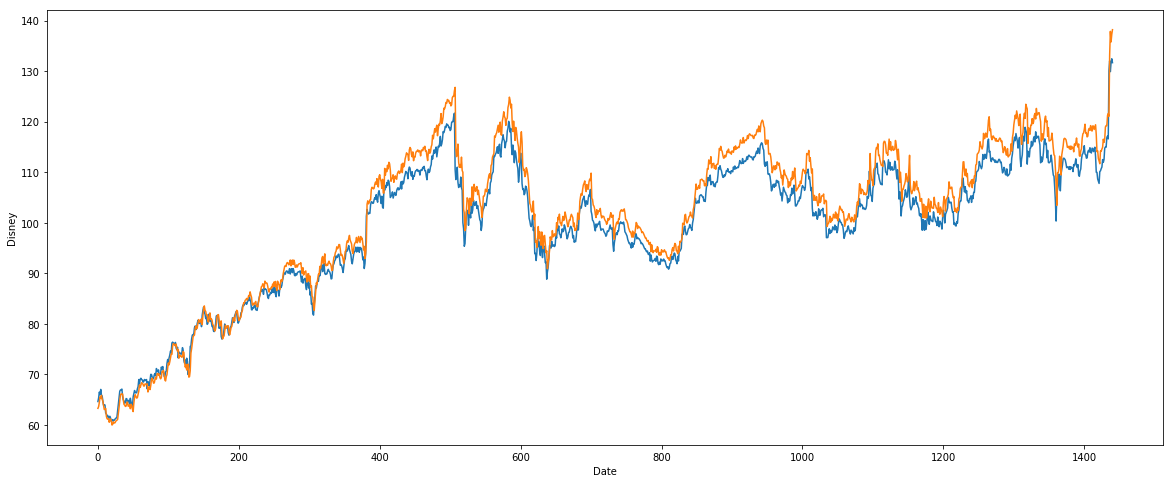

In [67]:
# get the predicted values
predicted_values = model.predict(X_test)
num_test_samples = len(predicted_values)
predicted_values = np.reshape(predicted_values, (num_test_samples,1))

# plot the results
fig = plt.figure(figsize=(20,8))
plt.plot(y_test + shifted_value)
plt.plot(predicted_values + shifted_value)
plt.xlabel('Date')
plt.ylabel('Disney')
plt.show();